In [310]:
from dolfin import * # load fenics functions 
import matplotlib.pyplot as plt # for plotting 

ky2ms ,y2s = 3.17098e-5, 3.154e+7 # km/yr to m/s, yr to s 
ex ,ey = Constant ((1,0)), Constant ((0 ,1)) # unit vectors 

g0 , rho = 9.81, 917 
g = Constant((0, -g0)) # gravity vector 
eta0 = 4.5454e+14 # viscosity 

mesh = Mesh("initial.xml"); 
boundaries = MeshFunction("size_t", mesh , "initial_facet_region.xml")

E, nu  = 2.5e9, 0.3 # [Pa]


mu  = E/(2+2*nu)
lam = E*nu/((1+nu)*(1-2*nu))

def eps(u): return sym(grad(u)) # strain tensor (symmetric gradient of displacement field, i.e. 2x2 matrix)
def sig(u): return 2*mu*eps(u) + lam*Identity(2)*tr(eps(u))
def tau(u): return sig(u)+ tr(sig(u ))/2* Identity (2) # by definition
def tau_ij(sol, ei, ej):
    return dot(dot(tau( sol ), ei), ej)


Set up function space

In [311]:
deg = 1 # Polynomial degree 

U = VectorElement("Lagrange", mesh.ufl_cell(), deg+1)
P = FiniteElement("Lagrange", mesh.ufl_cell(), deg) 
Wele = MixedElement([U,P])
W = FunctionSpace(mesh, Wele) 
(u, p) = TrialFunctions(W) # the unknowns
(v, q) = TestFunctions(W) # the weight functions


Set up boundary conditions

In [312]:
bndB1 ,bndB2 ,bndL ,bndS = 1,2,3,4 # boundary IDs 

bc = [DirichletBC(W.sub(0),Constant((0,0)), boundaries, bndB1),\
      DirichletBC(W.sub(0),(0,0), boundaries, bndB2),\
      DirichletBC(W.sub(0),(0,0), boundaries, bndL)] 

Set up the weak stokes problem

In [313]:
def eps(u): 
    return sym(grad(u)) 

a0 = eta0*inner(eps(u), eps(v))*dx # Recall "* dx " => integral
a = a0 - p*div(v)*dx + q*div(u)*dx
L = dot(g,v)*dx 
   

Solve problem

In [314]:
wsol = Function(W) 
solve(a==L, wsol, bc)

Solving linear variational problem.


In [317]:
def plot_wsol(wsol, clim = 0.01):
    fig = plt.figure(figsize = (20,8))
    ax1 = fig.add_subplot(311)
    plot(wsol.sub(0))
    ax2 = fig.add_subplot(313)
    # plot(wsol.sub(1))
    plot_devStress(tau_ij(wsol.sub(0), ex,ex), clim = clim)    

    ax3 = fig.add_subplot(312)
    plot_devStress(tau_ij(wsol.sub(0), ex,ey), clim = clim)    
    
    # plot(wsol.sub(0).sub(0))
    
    
    ax1.set_title("Velocity solution")
    ax2.set_title("tau_xx")
    ax3.set_title("tau_xy")
    
    
    fig.tight_layout()


Object cannot be plotted directly, projecting to piecewise linears.
Object cannot be plotted directly, projecting to piecewise linears.


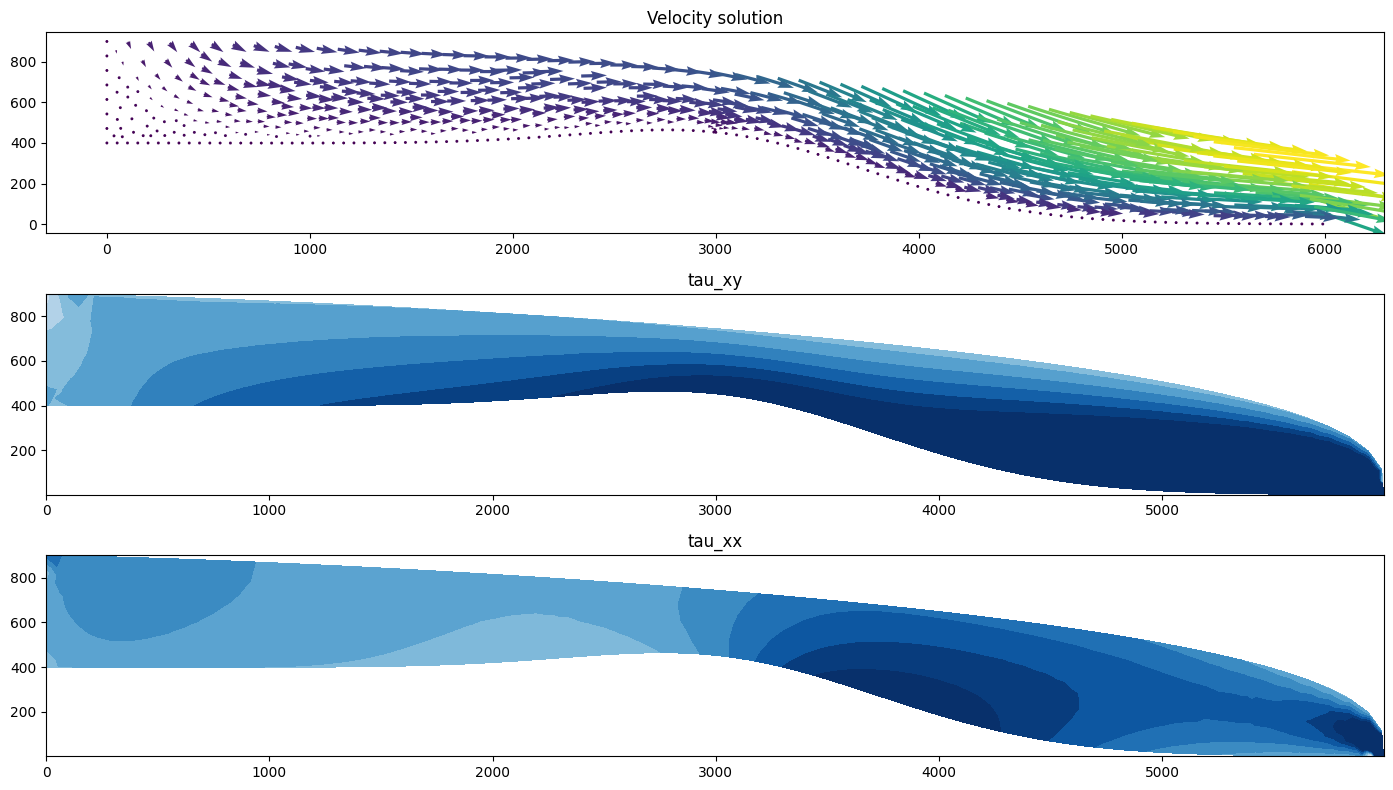

In [318]:
plot_wsol(wsol, clim = 0.001)

Try with new boundary conditions

Solving linear variational problem.
Object cannot be plotted directly, projecting to piecewise linears.
Object cannot be plotted directly, projecting to piecewise linears.


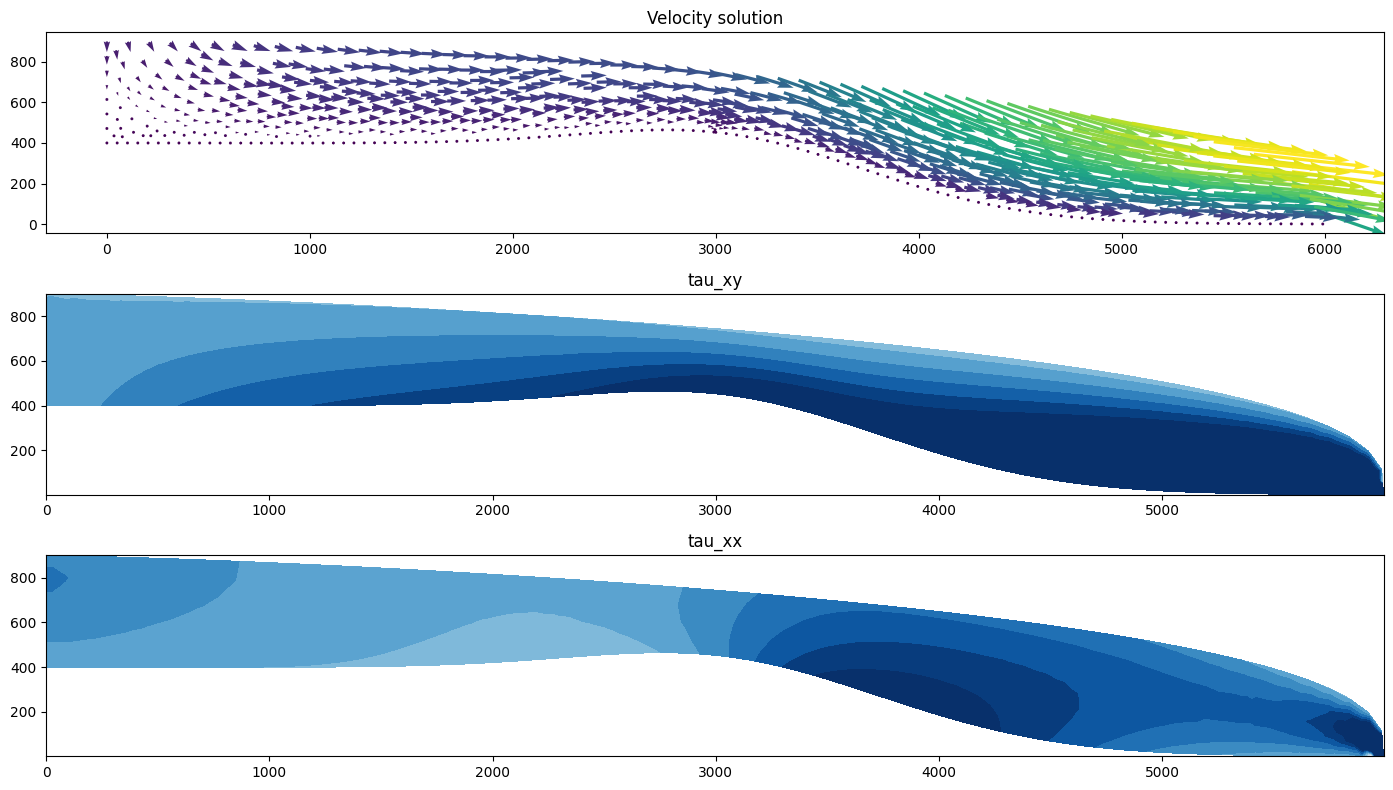

In [320]:
deg = 1 # Polynomial degree 

U = VectorElement("Lagrange", mesh.ufl_cell(), deg+1)
P = FiniteElement("Lagrange", mesh.ufl_cell(), deg) 
Wele = MixedElement([U,P])
W = FunctionSpace(mesh, Wele) 
(u, p) = TrialFunctions(W) # the unknowns
(v, q) = TestFunctions(W) # the weight functions


bndB1 ,bndB2 ,bndL ,bndS = 1,2,3,4 # boundary IDs 

bc = [DirichletBC(W.sub(0),Constant((0,0)), boundaries, bndB1),\
      DirichletBC(W.sub(0),(0,0), boundaries, bndB2),\
      DirichletBC(W.sub(0).sub(0),Constant(0), boundaries, bndL)] 


def eps(u): 
    return sym(grad(u)) 
a0 = eta0*inner(eps(u), eps(v))*dx # Recall "* dx " => integral
a = a0 - p*div(v)*dx + q*div(u)*dx
L = dot(g,v)*dx 

wsol = Function(W) 
solve(a==L, wsol, bc)

plot_wsol(wsol, clim = 0.001)
# plot(wsol.sub(0))
# plt.show()
# plot(wsol.sub(1))
# plt.show()

Make viscosity tperature-dependent

Solving linear variational problem.
Object cannot be plotted directly, projecting to piecewise linears.
Object cannot be plotted directly, projecting to piecewise linears.


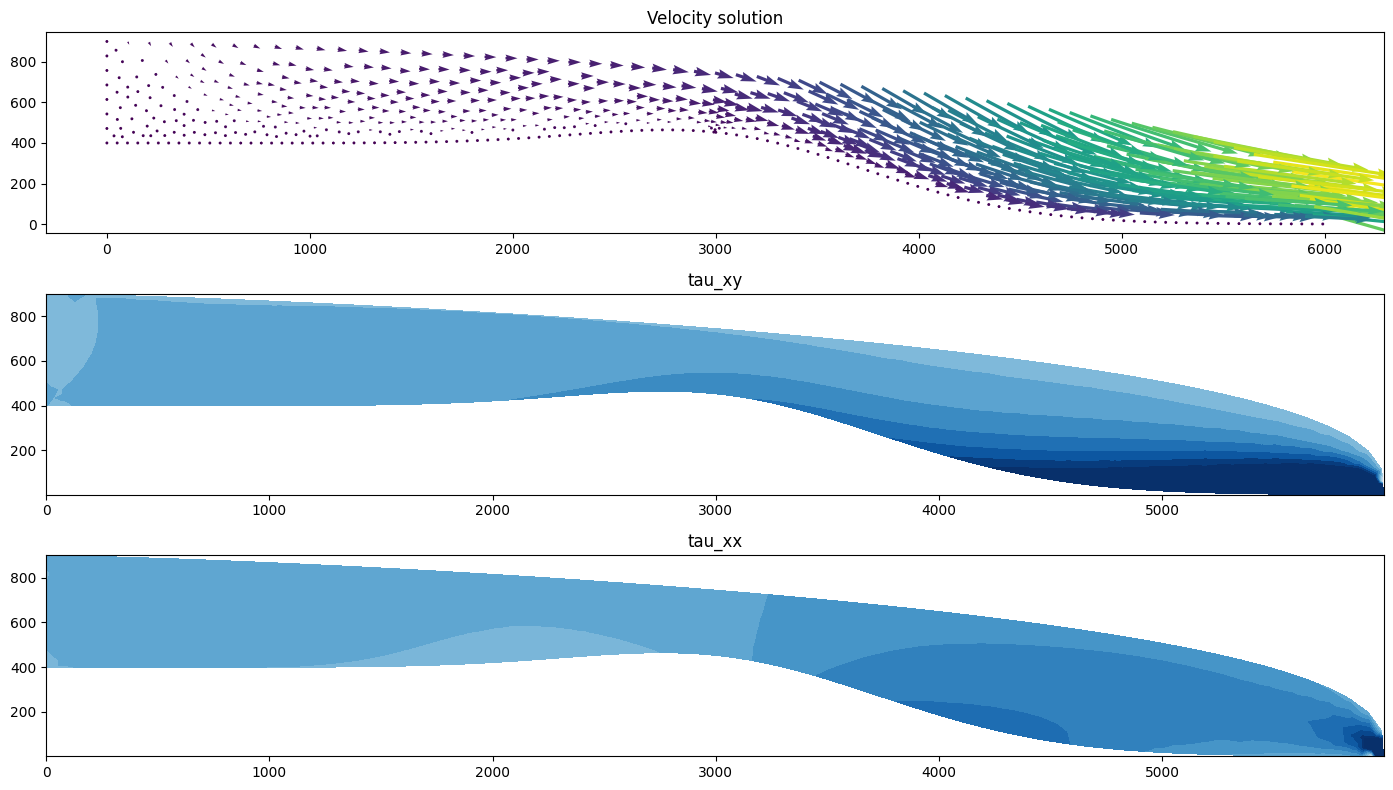

In [321]:
eta_dependent = Expression("eta0 /10*(1+9*x[1]/H)", eta0=eta0 , H=1000 , degree =1) 

deg = 1 # Polynomial degree 

U = VectorElement("Lagrange", mesh.ufl_cell(), deg+1)
P = FiniteElement("Lagrange", mesh.ufl_cell(), deg) 
Wele = MixedElement([U,P])
W = FunctionSpace(mesh, Wele) 
(u, p) = TrialFunctions(W) # the unknowns
(v, q) = TestFunctions(W) # the weight functions


bndB1 ,bndB2 ,bndL ,bndS = 1,2,3,4 # boundary IDs 

bc = [DirichletBC(W.sub(0),Constant((0,0)), boundaries, bndB1),\
      DirichletBC(W.sub(0),(0,0), boundaries, bndB2),\
      DirichletBC(W.sub(0),Constant((0,0)), boundaries, bndL)] 


def eps(u): 
    return sym(grad(u)) 

a0 = eta_dependent*inner(eps(u), eps(v))*dx # Recall "* dx " => integral
a = a0 - p*div(v)*dx + q*div(u)*dx
L = dot(g,v)*dx 

wsol = Function(W) 
solve(a==L, wsol, bc)

plot_wsol(wsol)

# plot(wsol.sub(0))
# plt.show()
# plot(wsol.sub(1))
# plt.show()

Large accumulation anomalies (snowfall)

Solving linear variational problem.
Object cannot be plotted directly, projecting to piecewise linears.
Object cannot be plotted directly, projecting to piecewise linears.


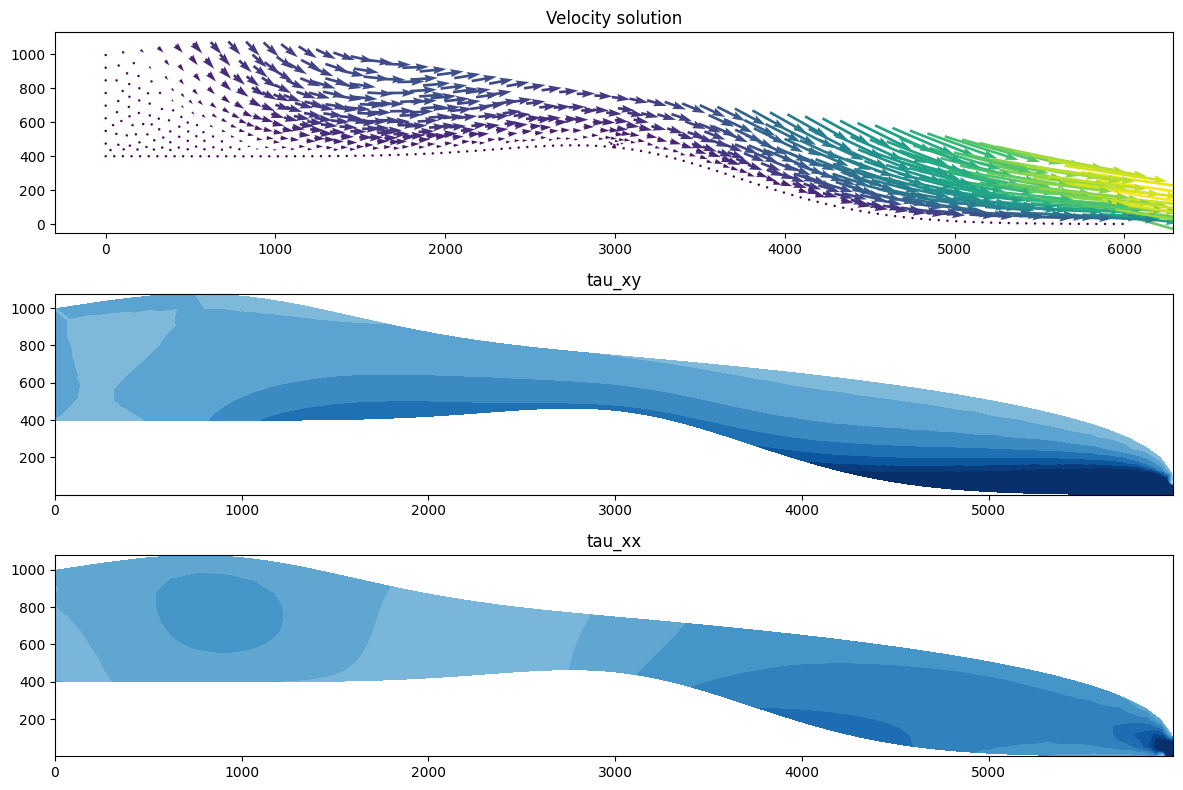

In [322]:
mesh = Mesh("accumulation.xml"); 
boundaries = MeshFunction("size_t", mesh , "accumulation_facet_region.xml")


eta_dependent = Expression("eta0 /10*(1+9*x[1]/H)", eta0=eta0 , H=1000 , degree =1) 

deg = 1 # Polynomial degree 

U = VectorElement("Lagrange", mesh.ufl_cell(), deg+1)
P = FiniteElement("Lagrange", mesh.ufl_cell(), deg) 
Wele = MixedElement([U,P])
W = FunctionSpace(mesh, Wele) 
(u, p) = TrialFunctions(W) # the unknowns
(v, q) = TestFunctions(W) # the weight functions


bndB1 ,bndB2 ,bndL ,bndS = 1,2,3,4 # boundary IDs 

bc = [DirichletBC(W.sub(0),Constant((0,0)), boundaries, bndB1),\
      DirichletBC(W.sub(0),(0,0), boundaries, bndB2),\
      DirichletBC(W.sub(0),Constant((0,0)), boundaries, bndL)] 


def eps(u): 
    return sym(grad(u)) 

a0 = eta_dependent*inner(eps(u), eps(v))*dx # Recall "* dx " => integral
a = a0 - p*div(v)*dx + q*div(u)*dx
L = dot(g,v)*dx 

wsol = Function(W) 
solve(a==L, wsol, bc)

plot_wsol(wsol)

# plot(wsol.sub(0))
# plt.show()
# plot(wsol.sub(1))
# plt.show()

Crevasses can form in glaciers where extensional stresses exceed a critical material strength:

Solving linear variational problem.
Object cannot be plotted directly, projecting to piecewise linears.
Object cannot be plotted directly, projecting to piecewise linears.


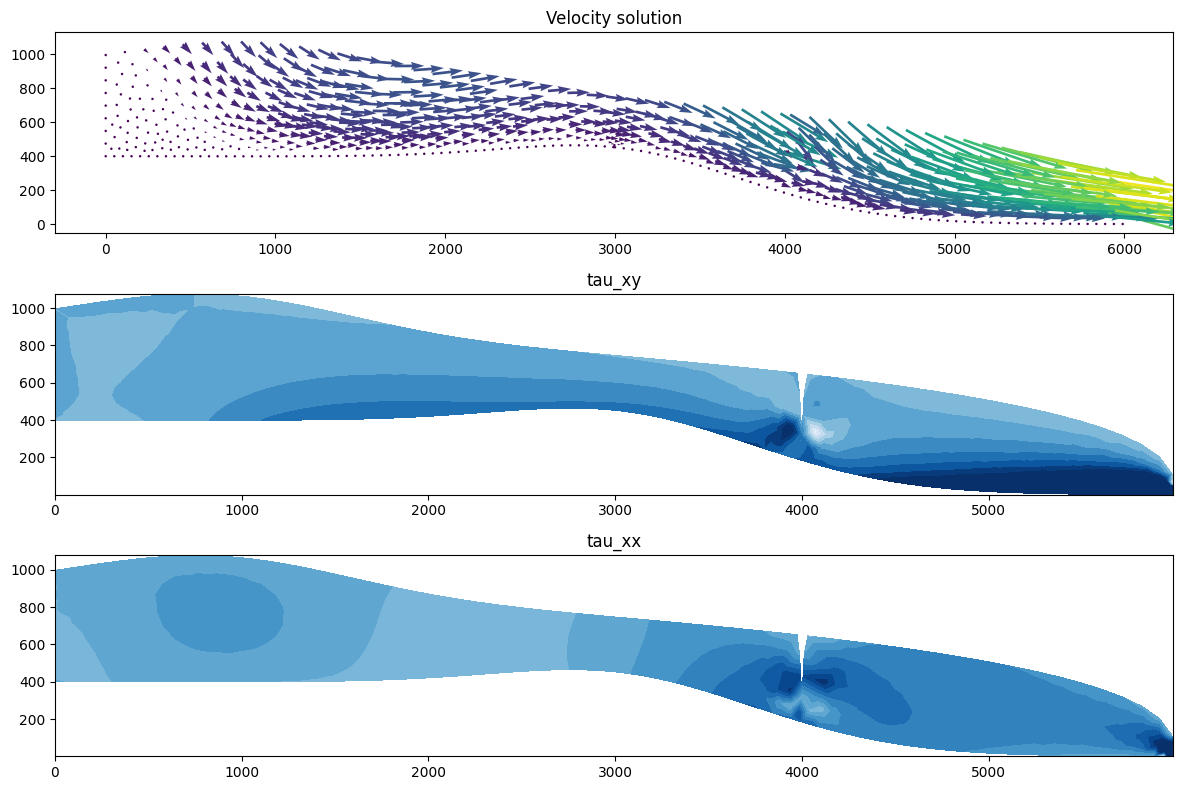

In [323]:
mesh = Mesh("crevasse.xml"); 
boundaries = MeshFunction("size_t", mesh , "crevasse_facet_region.xml")


eta_dependent = Expression("eta0 /10*(1+9*x[1]/H)", eta0=eta0 , H=1000 , degree =1) 

deg = 1 # Polynomial degree 

U = VectorElement("Lagrange", mesh.ufl_cell(), deg+1)
P = FiniteElement("Lagrange", mesh.ufl_cell(), deg) 
Wele = MixedElement([U,P])
W = FunctionSpace(mesh, Wele) 
(u, p) = TrialFunctions(W) # the unknowns
(v, q) = TestFunctions(W) # the weight functions


bndB1 ,bndB2 ,bndL ,bndS = 1,2,3,4 # boundary IDs 

bc = [DirichletBC(W.sub(0),Constant((0,0)), boundaries, bndB1),\
      DirichletBC(W.sub(0),(0,0), boundaries, bndB2),\
      DirichletBC(W.sub(0),Constant((0,0)), boundaries, bndL)] 


def eps(u): 
    return sym(grad(u)) 

a0 = eta_dependent*inner(eps(u), eps(v))*dx # Recall "* dx " => integral
a = a0 - p*div(v)*dx + q*div(u)*dx
L = dot(g,v)*dx 

wsol = Function(W) 
solve(a==L, wsol, bc)

plot_wsol(wsol)
# plot(wsol.sub(0))
# plt.show()
# plot(wsol.sub(1))
# plt.show()

The substrate can provide some shearstress resistance (frictional drag)

Solving linear variational problem.
Object cannot be plotted directly, projecting to piecewise linears.
Object cannot be plotted directly, projecting to piecewise linears.


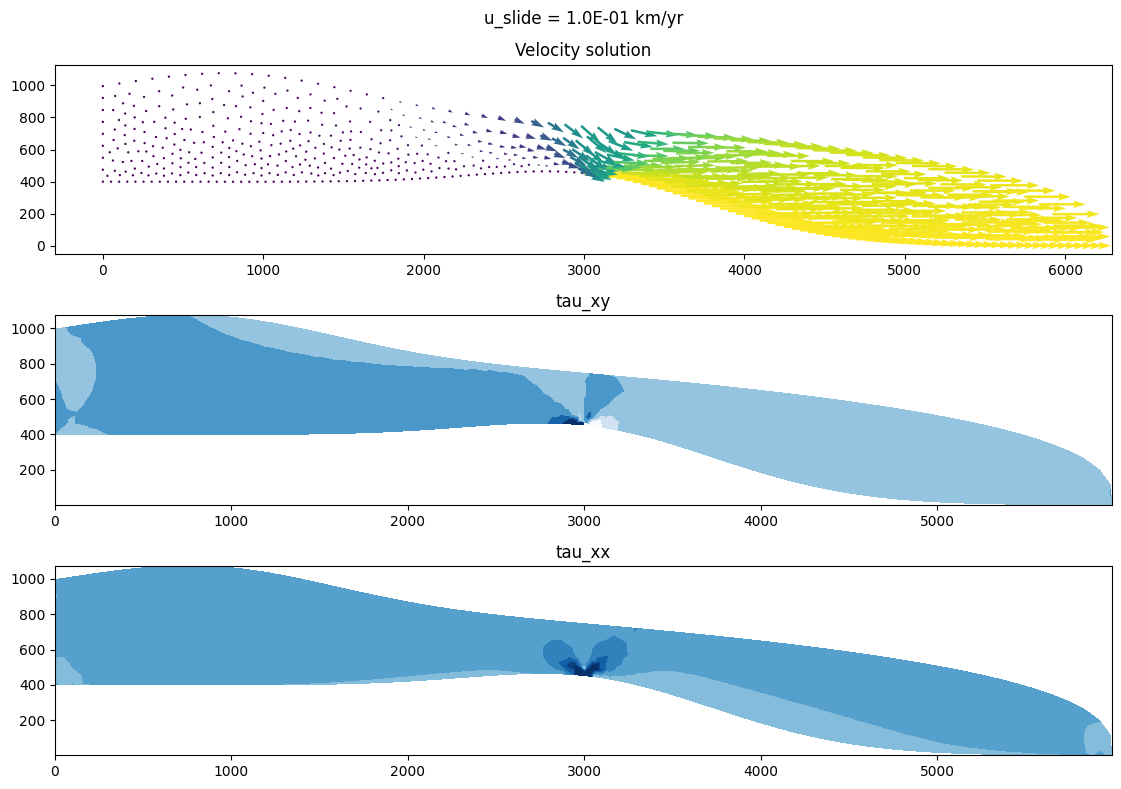

In [336]:
u_x = ky2ms*1e-5

for xxx in np.array([1])*1e-1:
    mesh = Mesh("accumulation.xml"); 
    boundaries = MeshFunction("size_t", mesh , "accumulation_facet_region.xml")


    eta_dependent = Expression("eta0 /10*(1+9*x[1]/H)", eta0=eta0 , H=1000 , degree =1) 

    deg = 1 # Polynomial degree 

    U = VectorElement("Lagrange", mesh.ufl_cell(), deg+1)
    P = FiniteElement("Lagrange", mesh.ufl_cell(), deg) 
    Wele = MixedElement([U,P])
    W = FunctionSpace(mesh, Wele) 
    (u, p) = TrialFunctions(W) # the unknowns
    (v, q) = TestFunctions(W) # the weight functions


    bndB1 ,bndB2 ,bndL ,bndS = 1,2,3,4 # boundary IDs 
    u_x = ky2ms*xxx

    bc = [DirichletBC(W.sub(0),Constant((0,0)), boundaries, bndB1),\
          DirichletBC(W.sub(0), Constant((u_x,0)), boundaries, bndB2),\
          DirichletBC(W.sub(0),Constant((0,0)), boundaries, bndL)] 


    def eps(u): 
        return sym(grad(u)) 

    a0 = eta_dependent*inner(eps(u), eps(v))*dx # Recall "* dx " => integral
    a = a0 - p*div(v)*dx + q*div(u)*dx
    L = dot(g,v)*dx 

    wsol = Function(W) 
    solve(a==L, wsol, bc)

    plot_wsol(wsol, clim = 20)
    plt.suptitle(f"u_slide = {xxx:.1E} km/yr")
    plt.tight_layout()
    plt.show()
    # plot(wsol.sub(0))
    # plt.show()
    # plot(wsol.sub(1))
    # plt.show()


In [275]:
def eps(u): return sym(grad(u)) # strain tensor (symmetric gradient of displacement field, i.e. 2x2 matrix)
def sig(u): return 2*mu*eps(u) + lam*Identity(2)*tr(eps(u))
def tau(u): return sig(u)+ tr(sig(u ))/2* Identity (2) # by definition
def tau_ij(sol, ei, ej):
    return dot(dot(tau( sol ), ei), ej)

Object cannot be plotted directly, projecting to piecewise linears.


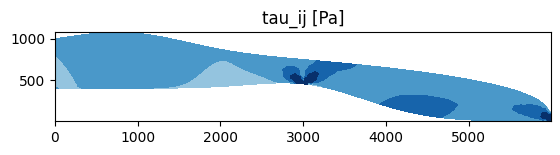

In [306]:

import matplotlib as mpl
def plot_devStress(tau_ij, clim=0.5, title='tau_ij', savePlot=False, ax = None):
    cmap = mpl.cm.Blues; # red-blue divergent colormap
    ticks=np.linspace(-clim,clim,10);

    h=plot(tau_ij, title=title+' [Pa]', cmap=cmap, norm=mpl.colors.Normalize(vmin=ticks[0], vmax=ticks[-1]))

    return h

plot_devStress(tau_ij(wsol.sub(0), ex,ex), clim = .01)

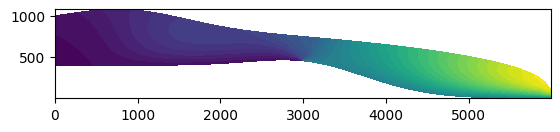

In [221]:
import numpy as np


# plot(tau_ij(wsol,ex,ex))
# plt.title("t_xx")
# plt.show()
# plot((abs(wsol.sub(0).sub(0))/abs(wsol.sub(0).sub(1))))
# plt.title("t_xy")
# plt.show()
# plot(wsol.sub(0))

# plot(tau_ij(wsol.sub(0),ey,ex))


plot((wsol.sub(0).sub(0)))

Text(0.5, 1.0, 'x-component of velocity')

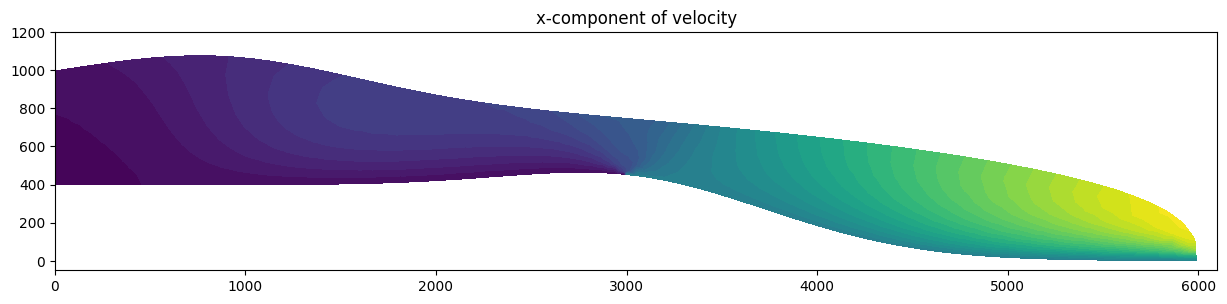

In [325]:
fig = plt.figure(figsize = (15,4))
# plot(dot(dot(tau( wsol.sub(0) ), ey), ex))
plot(wsol.sub(0).sub(0))
plt.ylim(-50,1200)
plt.xlim(0,6100)

plt.title("x-component of velocity")